In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from utils import *

In [2]:
# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

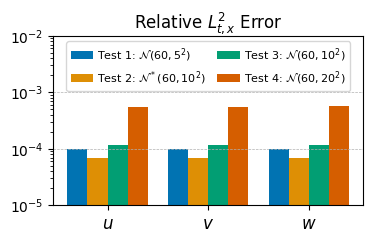

In [3]:
data = [
    [9.89e-05, 9.85e-05, 9.90e-05],
    [6.82e-05, 6.81e-05, 6.82e-05],
    [1.16e-04, 1.16e-04, 1.16e-04],
    [5.61e-04, 5.60e-04, 5.63e-04],
]


fig, ax = plt.subplots(figsize=(4, 2.2))

x = np.arange(3)
bar_width = 0.2

ax.bar(x - 1.5 * bar_width, data[0], width=bar_width, label=rf'Test 1: $\mathcal{{N}}(60,5^2)$', color=palette[0])
ax.bar(x - 0.5 * bar_width, data[1], width=bar_width, label=rf'Test 2: $\mathcal{{N}}^*(60, 10^2)$', color=palette[1])
ax.bar(x + 0.5 * bar_width, data[2], width=bar_width, label=rf'Test 3: $\mathcal{{N}}(60, 10^2)$', color=palette[2])
ax.bar(x + 1.5 * bar_width, data[3], width=bar_width, label=rf'Test 4: $\mathcal{{N}}(60, 20^2)$', color=palette[3])

ax.set_xticks(x)
ax.set_xticklabels([rf'$u$',rf'$v$',rf'$w$'], fontsize=12)
ax.set_yscale('log')
ax.set_yticks([1e-5, 1e-4, 1e-3, 1e-2])
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

ax.set_title('Relative $L_{t,x}^2$ Error')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=8, columnspacing=1, handletextpad=0.4)

In [6]:
# Energy
data = scipy.io.loadmat("./data/fig4b/energy_test.mat")
energy_bar = data['bar2']
energy_exa = data['ex2']

energy_bar = np.sum(energy_bar, axis=1) / 100
energy_exa = np.sum(energy_exa, axis=1) / 100

energy_bar /= energy_bar[0]
energy_exa /= energy_exa[0]

std_energy = [np.std(energy_bar), np.std(energy_exa)]


# Enstrophy
data = scipy.io.loadmat("./data/fig4b/enstrophy_test.mat")
enstrophy_bar = data['bar2']
enstrophy_exa = data['ex2']

enstrophy_bar = np.sum(enstrophy_bar, axis=1) / 100
enstrophy_exa = np.sum(enstrophy_exa, axis=1) / 100     

enstrophy_bar /= enstrophy_bar[0]
enstrophy_exa /= enstrophy_exa[0]

std_enstrophy = [np.std(enstrophy_bar), np.std(enstrophy_exa)]

x = np.linspace(0,1,101)
x = x[1:]

Text(0.5, 1.0, 'Dissipation of Physical Quantities')

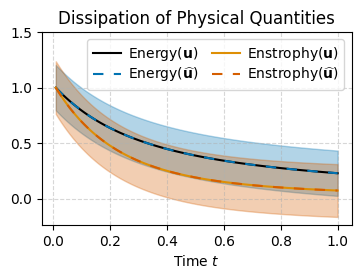

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5))

# Energy
ax.plot(x, energy_exa, linestyle='-', color='k', label=r'Energy($\mathbf{{u}}$)')
line, = ax.plot(x, energy_bar, linestyle='--', color=palette[0], label=r'Energy($\widehat{{\mathbf{{u}}}}$)')
line.set_dashes([5, 5])
ax.fill_between(x, energy_bar - std_energy[0], energy_bar + std_energy[0], color=palette[0], alpha=0.3)

# Enstrophy
ax.plot(x, enstrophy_exa, linestyle='-', color=palette[1], label=r'Enstrophy($\mathbf{{u}}$)')
line, = ax.plot(x, enstrophy_bar, linestyle='--', color=palette[3], label=r'Enstrophy($\widehat{{\mathbf{{u}}}}$)')
line.set_dashes([5, 5])
ax.fill_between(x, enstrophy_bar - std_enstrophy[0], enstrophy_bar + std_enstrophy[0], color=palette[3], alpha=0.3)

ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_xlabel(rf'Time $t$')

fig.legend(loc='upper center',
           bbox_to_anchor=(0.56, 0.88),
           ncol=2,
           columnspacing=1,     
           labelspacing=0.2,      
           handletextpad=0.5,     
           fontsize=10)

ax.set_title('Dissipation of Physical Quantities')